# WeatherPy

In [1]:
# Dependencies
import openweathermapy.core as owm
import csv
import json
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import random
from config import api_key
from citipy import citipy
from pprint import pprint

# Generate Cities List

In [2]:
# Randomly generate representative latitude and longtitude
cities = []

# print (len(r_latitude))
# Make a request to citipy module to get the city using these random coordinates
# Have to repeat filing ou the cities[] with numbers due to limitaton of random function
for n in range(4):
    # Get random 140 cities, the latitude range does not allow to get all 500+ at once
    # As for some of these city data could be absent
    r_latitude = random.sample(list(range(-60, 80)), 140)
    ##SAMPLE##r_latitude = random.sample(list(range(-60, 80)), 10)
    r_latitude
    r_longtitude = random.sample(list(range(-170, 170)), 140)
    ##SAMPLE##r_longtitude = random.sample(list(range(-170, 170)), 10)
    r_longtitude
    i = 0
    for i in range(len(r_latitude)):
        ##TEST##print(f"Number: {i}. For latitude: {r_latitude[i]} and for longtitude: {r_longtitude[i]}")

        # Get the city by (latitude,longtitude) coordinates
        #cities.append(citipy.nearest_city(x,y))
        cities.append(citipy.nearest_city(r_latitude[i],r_longtitude[i]))
        ##TEST##print(f"i time execution = {n*len(r_latitude) + i}")
        ###TEST##print( f"{cities[n*len(r_latitude) + i].city_name}")
        ###TEST##print( f"{cities[n*len(r_latitude) + i].country_code}")
    ###TEST##print(f"The number of cities = {n*len(r_latitude) + (i+1)}")
    ###TEST##print(f"We had {(n+1)*len(r_latitude)} calls to citypy module!")
    # print(f"{cities}")

# Testing the results    
print(f"We got {(n+1)*len(r_latitude)} random cities to analyse the weather.")
# # Now we got all 500+ needed cities
# k=0
# for city in cities:
#     country_code = city.country_code
#     city_name = city.city_name
#     k=k+1
#     print(f"For city '{city_name}' country code: '{country_code}'")
# print(f"K = {k}")

We got 560 random cities to analyse the weather.


# Perform API calls

In [3]:
# Get current weather for the chosen 500+ cities
# all_cities = [ single_city[0] for single_city in cities ]
all_cities = [ city.city_name for city in cities ]
###TEST##print(f'{all_cities}')

# Create a database frame
my_city_data_df = pd.DataFrame(all_cities, columns=["City"])
my_city_data_df

# Set up additional columns to keep information
my_city_data_df["Cloudiness"] = ""
my_city_data_df["Country"] = ""
my_city_data_df["Date"] = ""
my_city_data_df["Humidity"] = ""
my_city_data_df["Lat"] = ""
my_city_data_df["Lng"] = ""
my_city_data_df["Max Temp"] = ""
my_city_data_df["Wind Speed"] = ""
my_city_data_df.head()

##########################################
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Create settings dictionary with information we need to make a call to OpenWeatherMapy module
settings = { "units": "imperial", "appid": api_key}

# Create an "extracts" object to get all fields from Weather Map API  for each chosen city
# required for building scatter plots
#summary = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed"]
summary = ["id", "clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed"]

number_of_cities_processes = 0

# Use iterrows to iterate through panadas dataframe
for index, row in my_city_data_df.iterrows():
    
    # get City from dataframe
    one_city = row["City"]   
    
    # Make API request through OpenWeatherMapy module

    try:
        ###response = requests.get(query_url + one_city).json()
#     lat.append(response['coord']['lat'])
#     temp.append(response['main']['temp'])
        response = owm.get_current(one_city, **settings)
        one_city_results = response(*summary)
        print(f"Processing Record '{index}' for city: '{one_city}'. City number: '{one_city_results[0]}'") 
        # Populate Dataframe my_city_data_df 
        my_city_data_df.loc[index, "Cloudiness"] = int(one_city_results[1])
        my_city_data_df.loc[index, "Country"] = one_city_results[2]
        my_city_data_df.loc[index, "Date"] = one_city_results[3]
        my_city_data_df.loc[index, "Humidity"] = int(one_city_results[4])
        my_city_data_df.loc[index, "Lat"] = float(one_city_results[5])
        my_city_data_df.loc[index, "Lng"] = float(one_city_results[6])
        my_city_data_df.loc[index, "Max Temp"] = float(one_city_results[7])
        my_city_data_df.loc[index, "Wind Speed"] = float(one_city_results[8])
        ###print(f'{my_city_data_df}')   
        ###TEST##print(f"The current weather summary for '{one_city}' is '{one_city_results}'")
        ##print(f"Processing Record '{index}' for city: '{one_city}'. City nunber: City is '{response}'") 
        number_of_cities_processes = number_of_cities_processes + 1
    except Exception:
        print(f"For city '{one_city}' NO DATA FOUND.") 
print(f"----------All API calls are completed. {number_of_cities_processes} cities processed successfully.")
###print(f'{my_city_data_df}') 
###my_city_data_df.count()


Processing Record '0' for city: 'hithadhoo'. City number: '1282256'
Processing Record '1' for city: 'baruun-urt'. City number: '2032614'
Processing Record '2' for city: 'port hedland'. City number: '2063042'
Processing Record '3' for city: 'avarua'. City number: '4035715'
Processing Record '4' for city: 'wajima'. City number: '1848976'
Processing Record '5' for city: 'guerrero negro'. City number: '4021858'
Processing Record '6' for city: 'zubtsov'. City number: '462008'
Processing Record '7' for city: 'saldanha'. City number: '2737599'
Processing Record '8' for city: 'ribeira grande'. City number: '3372707'
Processing Record '9' for city: 'caconda'. City number: '3351380'
Processing Record '10' for city: 'patrocinio'. City number: '1712808'
Processing Record '11' for city: 'jamestown'. City number: '2069194'
Processing Record '12' for city: 'yoichi'. City number: '2129218'
Processing Record '13' for city: 'atuona'. City number: '4020109'
Processing Record '14' for city: 'bage'. City n

Processing Record '125' for city: 'omboue'. City number: '2396853'
Processing Record '126' for city: 'jamestown'. City number: '2069194'
Processing Record '127' for city: 'severo-kurilsk'. City number: '2121385'
Processing Record '128' for city: 'viedma'. City number: '3832899'
Processing Record '129' for city: 'hilo'. City number: '5855927'
Processing Record '130' for city: 'tasiilaq'. City number: '3424607'
For city 'hvammstangi' NO DATA FOUND.
Processing Record '132' for city: 'keti bandar'. City number: '1174451'
Processing Record '133' for city: 'horki'. City number: '627905'
For city 'grand river south east' NO DATA FOUND.
Processing Record '135' for city: 'solnechnyy'. City number: '2016307'
For city 'attawapiskat' NO DATA FOUND.
Processing Record '137' for city: 'xining'. City number: '1788852'
Processing Record '138' for city: 'rikitea'. City number: '4030556'
Processing Record '139' for city: 'kapaa'. City number: '5848280'
Processing Record '140' for city: 'henties bay'. Cit

Processing Record '249' for city: 'severnoye'. City number: '496381'
Processing Record '250' for city: 'mackenzie'. City number: '6063191'
Processing Record '251' for city: 'kollam'. City number: '1259091'
Processing Record '252' for city: 'victoria'. City number: '1733782'
Processing Record '253' for city: 'comodoro rivadavia'. City number: '3860443'
For city 'burica' NO DATA FOUND.
Processing Record '255' for city: 'bandarbeyla'. City number: '64814'
Processing Record '256' for city: 'sao joao da barra'. City number: '3448903'
Processing Record '257' for city: 'arraial do cabo'. City number: '3471451'
Processing Record '258' for city: 'cabo san lucas'. City number: '3985710'
Processing Record '259' for city: 'kapaa'. City number: '5848280'
Processing Record '260' for city: 'mahebourg'. City number: '934322'
Processing Record '261' for city: 'tahe'. City number: '2034615'
Processing Record '262' for city: 'ribeira grande'. City number: '3372707'
Processing Record '263' for city: 'pang

Processing Record '376' for city: 'jamestown'. City number: '2069194'
Processing Record '377' for city: 'lorengau'. City number: '2092164'
Processing Record '378' for city: 'saint anthony'. City number: '5606187'
Processing Record '379' for city: 'klaksvik'. City number: '2618795'
Processing Record '380' for city: 'zhanakorgan'. City number: '1517323'
Processing Record '381' for city: 'thompson'. City number: '6165406'
Processing Record '382' for city: 'mantua'. City number: '3174050'
Processing Record '383' for city: 'chuy'. City number: '3443061'
Processing Record '384' for city: 'verkhnevilyuysk'. City number: '2013639'
Processing Record '385' for city: 'aswan'. City number: '359792'
Processing Record '386' for city: 'punta arenas'. City number: '3874787'
Processing Record '387' for city: 'pitimbu'. City number: '3391889'
Processing Record '388' for city: 'meulaboh'. City number: '1214488'
Processing Record '389' for city: 'kendari'. City number: '1640344'
Processing Record '390' fo

Processing Record '500' for city: 'little current'. City number: '6055388'
Processing Record '501' for city: 'ponta do sol'. City number: '3453439'
Processing Record '502' for city: 'atuona'. City number: '4020109'
Processing Record '503' for city: 'athabasca'. City number: '5887916'
Processing Record '504' for city: 'chitungwiza'. City number: '1106542'
Processing Record '505' for city: 'mataura'. City number: '6201424'
Processing Record '506' for city: 'kodiak'. City number: '4407665'
Processing Record '507' for city: 'burnie'. City number: '2173125'
Processing Record '508' for city: 'norman wells'. City number: '6089245'
Processing Record '509' for city: 'adrar'. City number: '2508813'
Processing Record '510' for city: 'rindal'. City number: '3141866'
Processing Record '511' for city: 'mataura'. City number: '6201424'
Processing Record '512' for city: 'guerrero negro'. City number: '4021858'
Processing Record '513' for city: 'victoria'. City number: '1733782'
Processing Record '514'

In [4]:
# Clean my_city_data_df data set - choose only rows with the populated weather data
valid_weather_data = my_city_data_df[my_city_data_df["Country"] != ""]
###print(valid_weather_data["City"].count())

##print(f'{my_city_data_df}') 
##print(f'{valid_weather_data}') 
print(f'{valid_weather_data.count()}')

# Get correct data types for the columns
valid_weather_data = valid_weather_data.infer_objects()
##valid_weather_data.info()
valid_weather_data.head(20)

# Save all Valid Weather Data in CSV file
valid_weather_data.to_csv("city_weather_data.csv", encoding="utf-8", index=False)

# Display valid_weather_data, which will be used for scatter plots
valid_weather_data.head(10)

City          517
Cloudiness    517
Country       517
Date          517
Humidity      517
Lat           517
Lng           517
Max Temp      517
Wind Speed    517
dtype: int64


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hithadhoo,80,MV,1529610756,100,-0.60,73.08,83.06,6.73
1,baruun-urt,88,MN,1529610756,48,46.68,113.28,65.78,9.31
2,port hedland,0,AU,1529607600,50,-20.31,118.58,55.40,6.93
3,avarua,0,CK,1529610608,97,-21.21,-159.78,78.83,8.86
4,wajima,0,JP,1529610757,95,37.40,136.90,65.06,7.63
5,guerrero negro,0,MX,1529610649,58,27.97,-114.04,74.24,11.10
6,zubtsov,0,RU,1529610757,65,56.17,34.59,65.69,10.83
7,saldanha,0,PT,1529610757,85,41.42,-6.55,66.86,5.12
8,ribeira grande,75,PT,1529609400,73,38.52,-28.70,73.40,6.93
9,caconda,0,AO,1529610757,46,-13.73,15.06,52.10,6.35


# Latitude vs. Temperature Plot

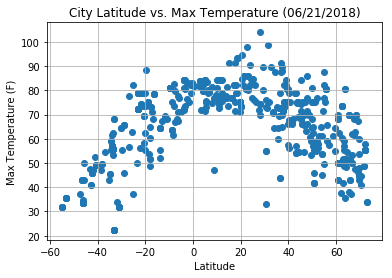

In [5]:
# Build a scatter plot for each data type
plt.scatter(valid_weather_data["Lat"], valid_weather_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (06/21/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsMaxTemperature.png")

# Show plot
plt.show()

# Latitude vs. Humidity Plot

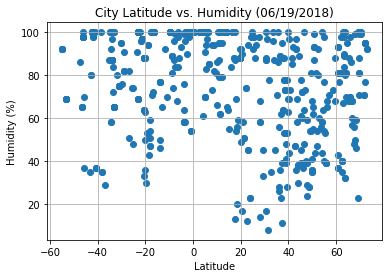

In [6]:
# Build a scatter plot for each data type
plt.scatter(valid_weather_data["Lat"], valid_weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (06/19/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsHumidity.png")

# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

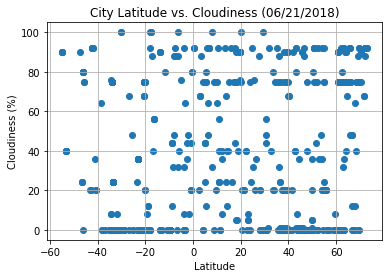

In [7]:
# Build a scatter plot for each data type
plt.scatter(valid_weather_data["Lat"], valid_weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (06/21/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsCloudiness.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

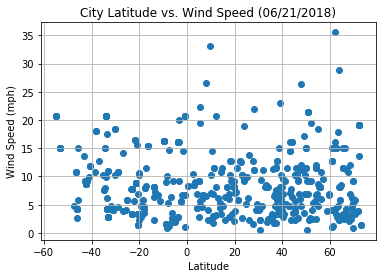

In [8]:
# Build a scatter plot for each data type
plt.scatter(valid_weather_data["Lat"], valid_weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (06/21/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudevsWindSpeed.png")

# Show plot
plt.show()